## **Import Library**

In [1]:
# Mengimport semua library yang dibutuhkan
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import timedelta
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from IPython.display import display, Markdown
from sklearn.preprocessing import RobustScaler, StandardScaler

## **Memuat Dataset**

In [2]:
# Load dataset dari URL
url = "https://media.githubusercontent.com/media/Evameivina/Customer-Segmentation/refs/heads/main/online_retail_II.csv"
df = pd.read_csv(url, encoding='ISO-8859-1')

## **Exploratory Data Analysis (EDA)**

In [3]:
# Menampilkan jumlah baris, kolom, dan daftar nama kolom pada dataset
print("Bentuk Dataset:", df.shape)
print("Kolom:", df.columns.tolist())

Bentuk Dataset: (1067371, 8)
Kolom: ['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country']


In [4]:
# Menampilkan 5 baris pertama dari dataset
display(df.head())

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
# Menampilkan tipe data tiap dan non-null tiap kolom
display(Markdown("**Informasi Dataset:**"))
df.info()

**Informasi Dataset:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [6]:
# Jumlah nilai unik per kolom
display(Markdown("**Jumlah Nilai Unik Per Kolom:**"))
unique_counts = df.nunique()
print(unique_counts)

**Jumlah Nilai Unik Per Kolom:**

Invoice        53628
StockCode       5305
Description     5698
Quantity        1057
InvoiceDate    47635
Price           2807
Customer ID     5942
Country           43
dtype: int64


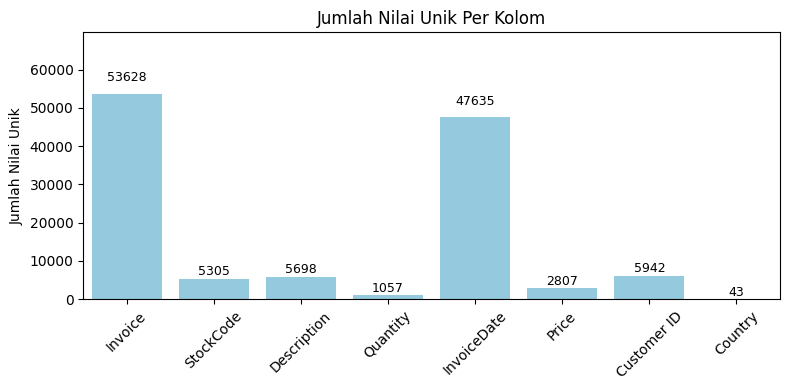

In [7]:
# Visualisasi jumlah nilai unik per kolom
unique_counts = df.nunique()
plt.figure(figsize=(8,4))
ax = sns.barplot(x=list(unique_counts.index), y=unique_counts.values, color="skyblue")
plt.ylim(0, max(unique_counts.values) * 1.3)
for i, v in enumerate(unique_counts.values):
    ax.text(i, v + 0.05 * v, str(v), ha='center', va='bottom', fontsize=9)
plt.title("Jumlah Nilai Unik Per Kolom")
plt.xticks(rotation=45)
plt.ylabel("Jumlah Nilai Unik")
plt.tight_layout()
plt.show()

In [8]:
# Menganalisis missing value per kolom
display(Markdown("**Jumlah Missing Value Per Kolom:**"))
missing_count = df.isnull().sum()
missing_pct = (df.isnull().mean() * 100).round(2)
missing_summary = pd.DataFrame({
    'Jumlah Missing': missing_count,
    'Persentase Missing': missing_pct
})
print(missing_summary)

**Jumlah Missing Value Per Kolom:**

             Jumlah Missing  Persentase Missing
Invoice                   0                0.00
StockCode                 0                0.00
Description            4382                0.41
Quantity                  0                0.00
InvoiceDate               0                0.00
Price                     0                0.00
Customer ID          243007               22.77
Country                   0                0.00


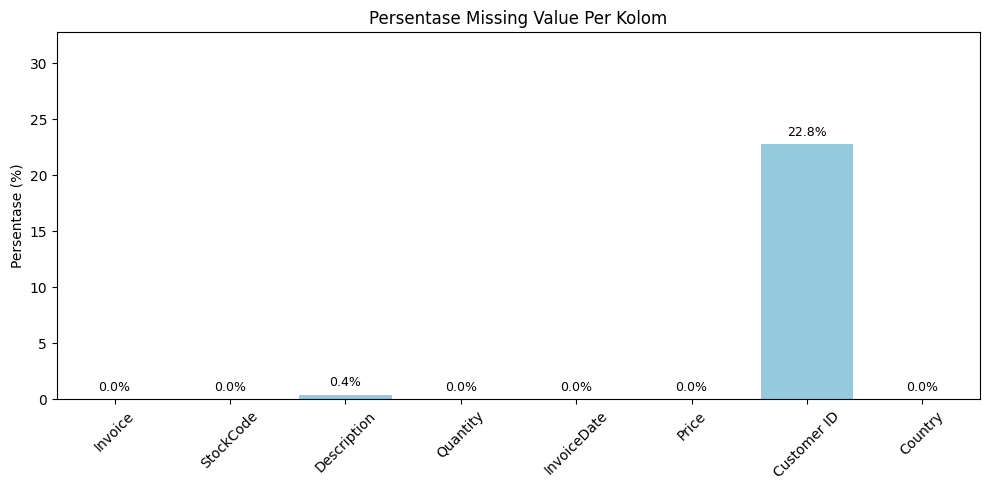

In [9]:
# Visualisasi presentase missing value per kolom
missing_pct = (df.isnull().mean() * 100).round(2)
plt.figure(figsize=(10,5))
ax = sns.barplot(x=missing_pct.index, y=missing_pct.values, color="skyblue")
for i, v in enumerate(missing_pct.values):
    ax.text(i, v + 0.5, f"{v:.1f}%", ha='center', va='bottom', fontsize=9)
plt.ylim(0, missing_pct.max() + 10)
plt.title("Persentase Missing Value Per Kolom")
plt.ylabel("Persentase (%)")
plt.xlabel("")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# Menampilkan statistik deskriptif untuk semua kolom
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Invoice,1067371,53628,537434,1350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,1067371,5305,85123A,5829,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,1062989,5698,WHITE HANGING HEART T-LIGHT HOLDER,5918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,1067371.0,NaN,NaN,NaN,9.938898,172.705794,-80995.0,1.0,3.0,10.0,80995.0
InvoiceDate,1067371,47635,2010-12-06 16:57:00,1350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,1067371.0,NaN,NaN,NaN,4.649388,123.553059,-53594.36,1.25,2.1,4.15,38970.0
Customer ID,824364.0,NaN,NaN,NaN,15324.638504,1697.46445,12346.0,13975.0,15255.0,16797.0,18287.0
Country,1067371,43,United Kingdom,981330,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Mengonversi InvoiceDate menjadi datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Mengonversi Customer ID menjadi integer
df['Customer ID'] = df['Customer ID'].astype('float').astype('Int64')

In [12]:
# Menampilkan informasi dataset setelah konversi
display(Markdown("**Informasi Data Setelah Konversi:**"))
df.info()

**Informasi Data Setelah Konversi:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   Int64         
 7   Country      1067371 non-null  object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 66.2+ MB


In [13]:
# Menampilkan 10 baris pertama kolom numerik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
display(df[numeric_cols].head(10))

,Quantity,Price,Customer ID
0,12,6.95,13085
1,12,6.75,13085
2,12,6.75,13085
3,48,2.10,13085
4,24,1.25,13085
5,24,1.65,13085
6,24,1.25,13085
7,10,5.95,13085
8,12,2.55,13085
9,12,3.75,13085


In [14]:
# Menampilkan 10 baris pertama kolom kategorik
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
display(df[categorical_cols].head(10))

,Invoice,StockCode,Description,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,United Kingdom
8,489435,22350,CAT BOWL,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",United Kingdom


In [15]:
# Menganalisis baris dengan missing Description
missing_desc = df[df['Description'].isna()].copy()
display(missing_desc[['Quantity','Price']].describe())

,Quantity,Price
count,4382.000000,4382.0
mean,-17.262209,0.0
std,509.704959,0.0
min,-9600.000000,0.0
25%,-28.000000,0.0
50%,-4.000000,0.0
75%,3.000000,0.0
max,9600.000000,0.0


In [16]:
# Menganalisis tipe transaksi untuk baris dengan missing Description
missing_desc['qty_type'] = missing_desc['Quantity'].apply(lambda q: 'Return' if q < 0 else 'Stock Adjustment')
qty_counts = missing_desc['qty_type'].value_counts()
print(qty_counts)

qty_type
Return              2689
Stock Adjustment    1693
Name: count, dtype: int64


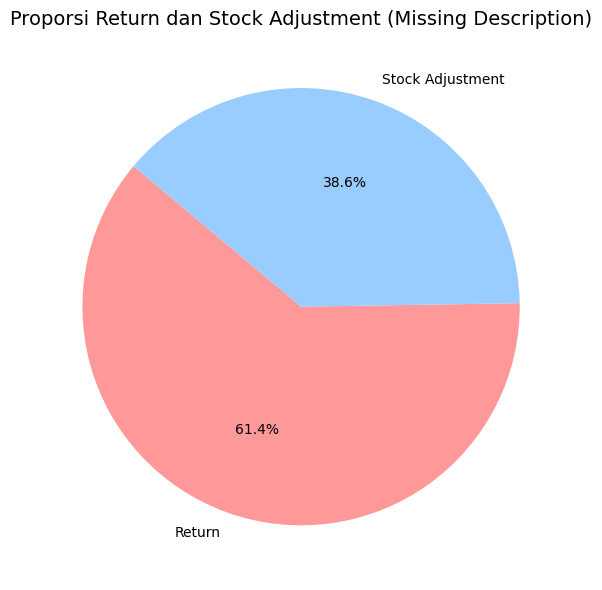

In [17]:
# Pie chart proporsi Return dan Stock Adjustment untuk missing Description
plt.figure(figsize=(6,6))
colors = ['#FF9999', '#99CCFF']
plt.pie(qty_counts.values, labels=qty_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Proporsi Return dan Stock Adjustment (Missing Description)", fontsize=14)
plt.tight_layout()
plt.show()

In [18]:
# Top 10 StockCode dengan missing Description
display(pd.DataFrame({
    'StockCode': missing_desc['StockCode'].value_counts().head(10).index,
    'Jumlah Missing Description': missing_desc['StockCode'].value_counts().head(10).values
}))

,StockCode,Jumlah Missing Description
0,84990,12
1,22139,12
2,35965,11
3,79321,11
4,22950,10
5,23084,10
6,22084,9
7,22087,9
8,37461,8
9,71477,8


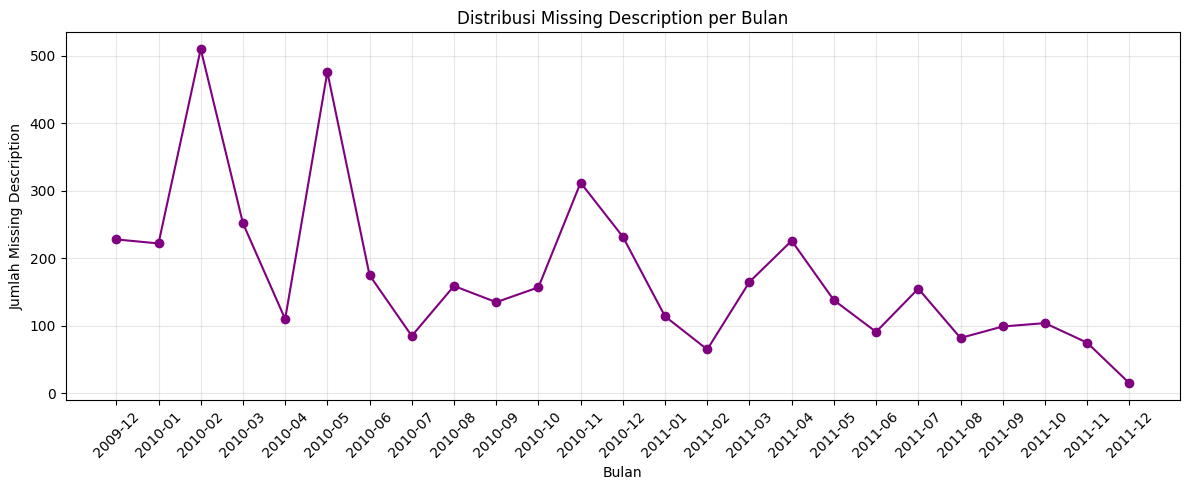

In [19]:
# Distribusi missing Description per bulan
missing_desc['year_month'] = missing_desc['InvoiceDate'].dt.to_period('M')
missing_per_month = missing_desc.groupby('year_month').size()

plt.figure(figsize=(12,5))
plt.plot(missing_per_month.index.astype(str), missing_per_month.values, marker='o', color='purple')
plt.xticks(rotation=45)
plt.xlabel("Bulan")
plt.ylabel("Jumlah Missing Description")
plt.title("Distribusi Missing Description per Bulan")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

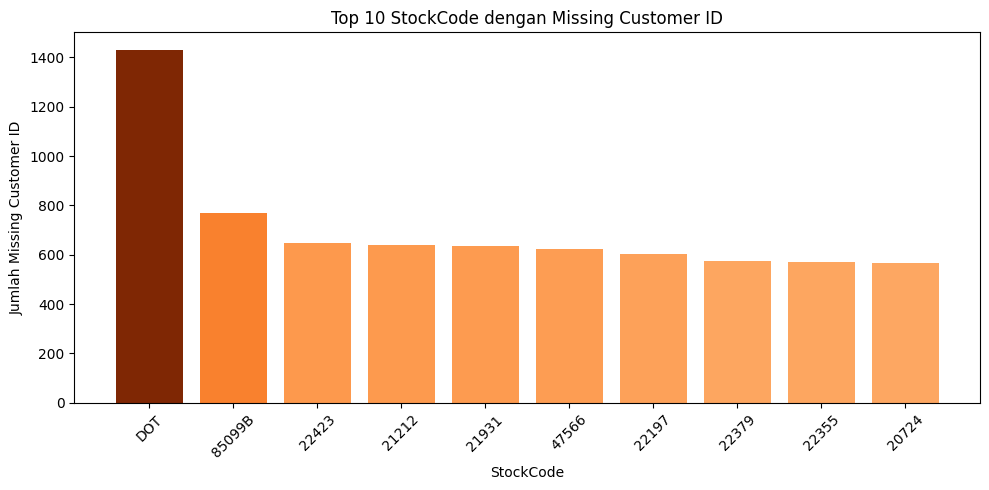

In [20]:
# Menganalisis dan memvisualisasikan Top 10 StockCode dengan missing Customer ID
missing_cust = df[df['Customer ID'].isna()].copy()
top10_missing_cust = missing_cust['StockCode'].value_counts().head(10)

plt.figure(figsize=(10,5))

norm = (top10_missing_cust.values - top10_missing_cust.min()) / (top10_missing_cust.max() - top10_missing_cust.min())
norm = 0.4 + 0.6 * norm
colors = [plt.cm.Oranges(n) for n in norm]

plt.bar(top10_missing_cust.index, top10_missing_cust.values, color=colors)
plt.xlabel("StockCode")
plt.ylabel("Jumlah Missing Customer ID")
plt.title("Top 10 StockCode dengan Missing Customer ID")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

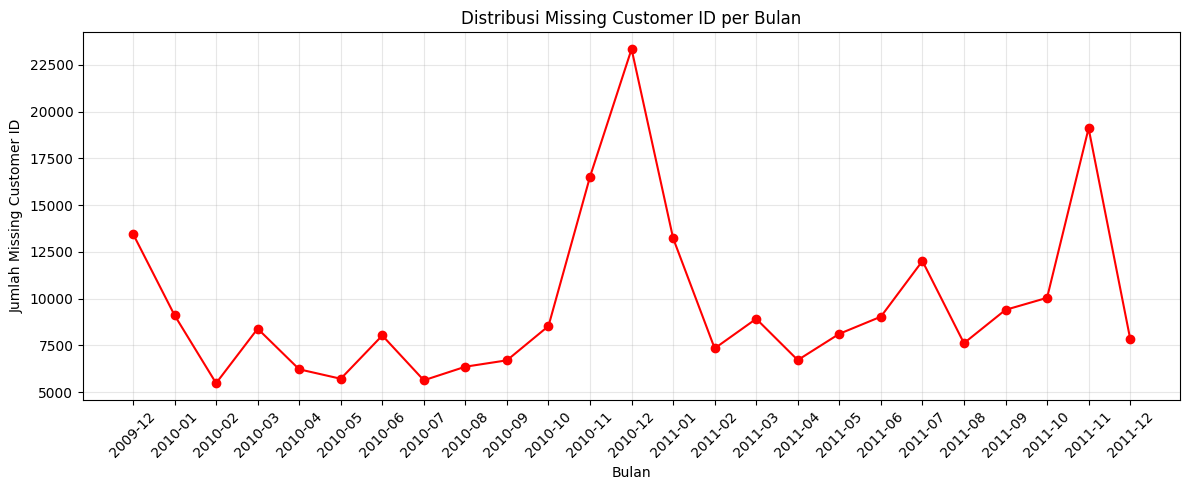

In [21]:
# Distribusi missing Customer ID per bulan
missing_cust['year_month'] = missing_cust['InvoiceDate'].dt.to_period('M')
missing_cust_month = missing_cust.groupby('year_month').size()

plt.figure(figsize=(12,5))
plt.plot(missing_cust_month.index.astype(str), missing_cust_month.values, marker='o', color='red')
plt.title("Distribusi Missing Customer ID per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Missing Customer ID")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

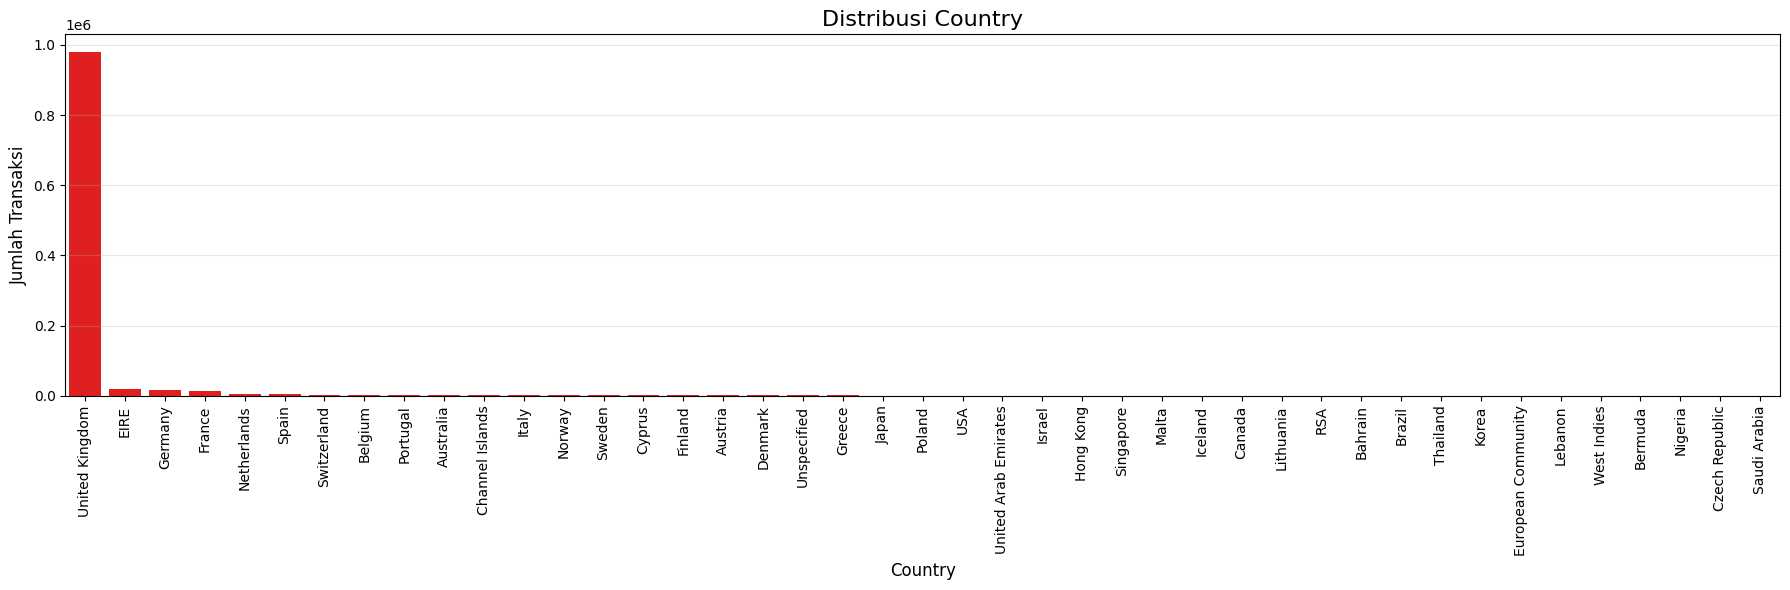

In [22]:
# Distribusi jumlah transaksi per Country
country_counts = df['Country'].value_counts()

plt.figure(figsize=(18,6))
sns.barplot(x=country_counts.index, y=country_counts.values, color='red')
plt.title("Distribusi Country", fontsize=16)
plt.xticks(rotation=90, fontsize=10)
plt.ylabel("Jumlah Transaksi", fontsize=12)
plt.xlabel("Country", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

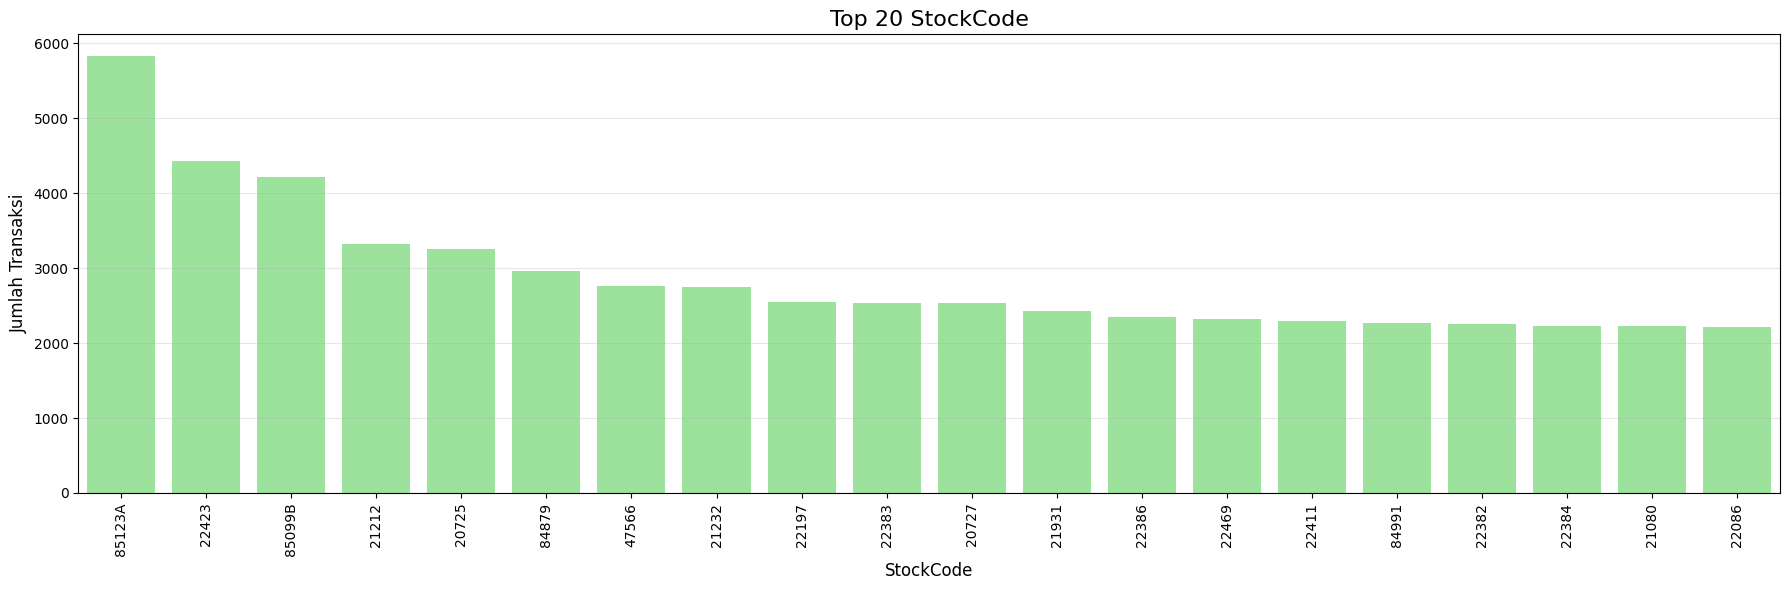

In [23]:
# Visualisasi 20 StockCode dengan transaksi terbanyak
top_stock = df['StockCode'].value_counts().head(20)

plt.figure(figsize=(18,6))
sns.barplot(x=top_stock.index, y=top_stock.values, color='lightgreen')
plt.title("Top 20 StockCode", fontsize=16)
plt.xticks(rotation=90, fontsize=10)
plt.ylabel("Jumlah Transaksi", fontsize=12)
plt.xlabel("StockCode", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

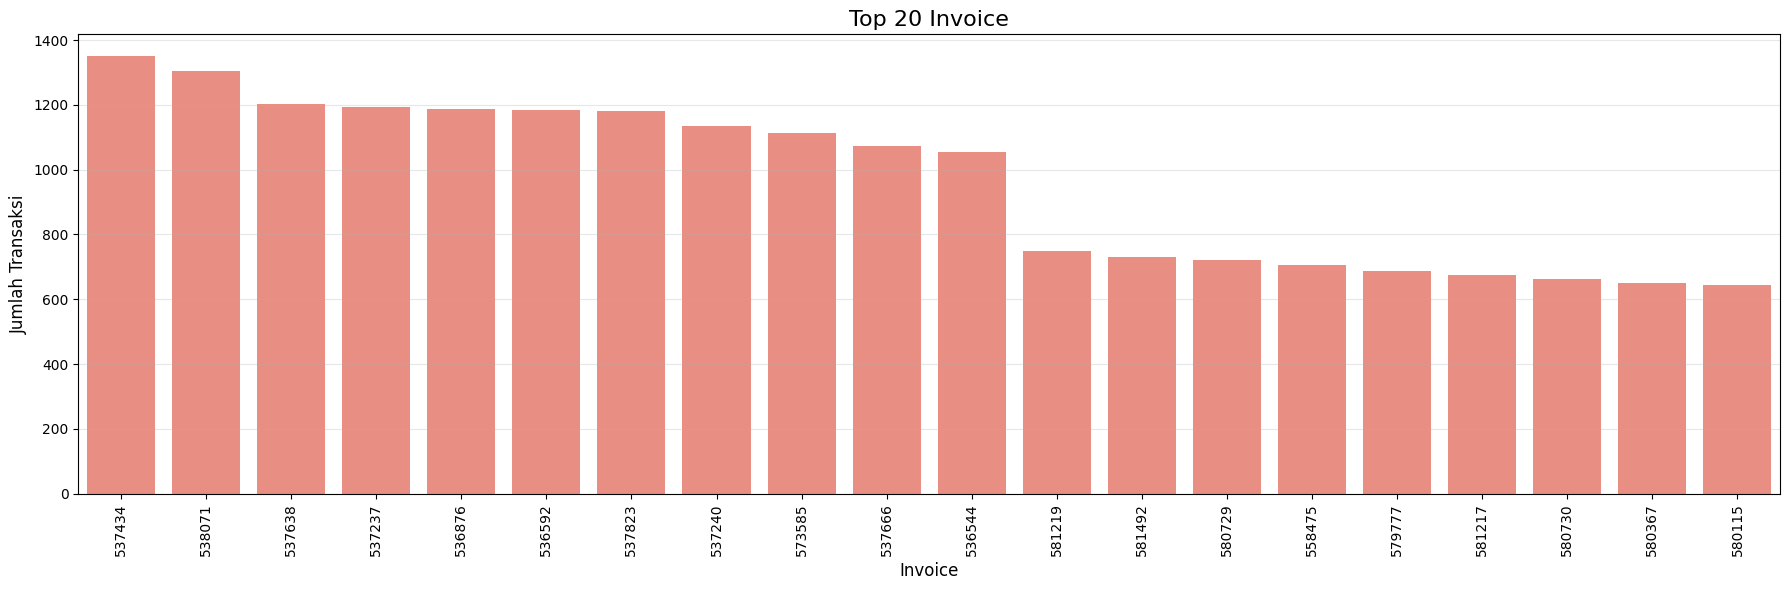

In [24]:
# Visualisasi 20 Invoice dengan transaksi terbanyak
top_invoice = df['Invoice'].value_counts().head(20)

plt.figure(figsize=(18,6))
sns.barplot(x=top_invoice.index, y=top_invoice.values, color='salmon')
plt.title("Top 20 Invoice", fontsize=16)
plt.xticks(rotation=90, fontsize=10)
plt.ylabel("Jumlah Transaksi", fontsize=12)
plt.xlabel("Invoice", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [25]:
# Membuat kolom TotalPrice dan menampilkan statistik deskriptif
df['TotalPrice'] = df['Quantity'] * df['Price']
display(df[['Quantity','Price','TotalPrice']].describe())

,Quantity,Price,TotalPrice
count,1.067371e+06,1.067371e+06,1.067371e+06
mean,9.938898e+00,4.649388e+00,1.806987e+01
std,1.727058e+02,1.235531e+02,2.924202e+02
min,-8.099500e+04,-5.359436e+04,-1.684696e+05
25%,1.000000e+00,1.250000e+00,3.750000e+00
50%,3.000000e+00,2.100000e+00,9.900000e+00
75%,1.000000e+01,4.150000e+00,1.770000e+01
max,8.099500e+04,3.897000e+04,1.684696e+05


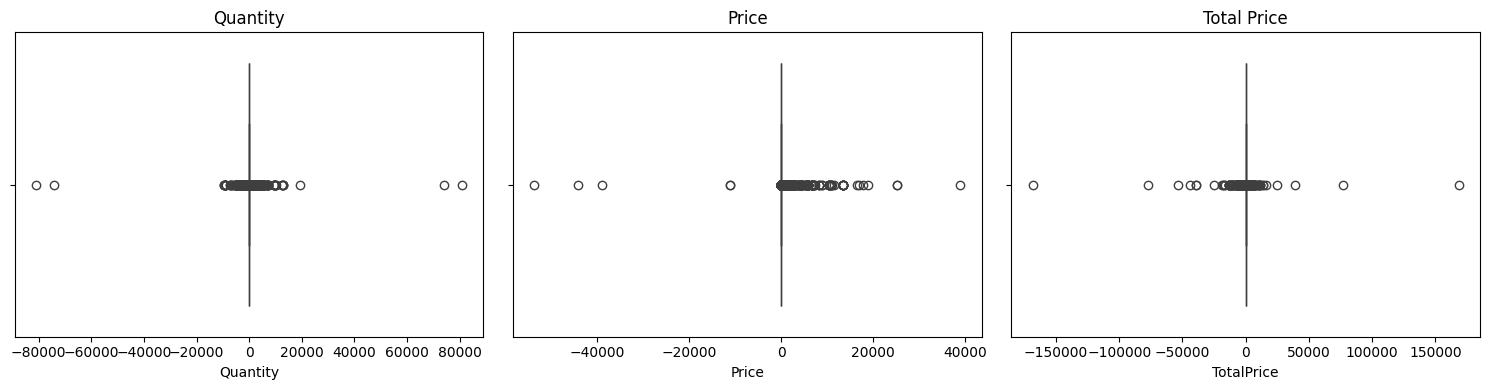

In [26]:
# Boxplot untuk mendeteksi outlier pada Quantity, Price, dan TotalPrice
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.boxplot(x=df['Quantity'])
plt.title("Quantity")

plt.subplot(1,3,2)
sns.boxplot(x=df['Price'])
plt.title("Price")

plt.subplot(1,3,3)
sns.boxplot(x=df['TotalPrice'])
plt.title("Total Price")

plt.tight_layout()
plt.show()

In [27]:
# Deteksi outlier menggunakan metode IQR
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outlier ({len(outliers)/len(df)*100:.2f}%)")
    return outliers

# Deteksi outlier pada kolom numerik
outlier_qty = detect_outliers(df, 'Quantity')
outlier_price = detect_outliers(df, 'Price')
outlier_total = detect_outliers(df, 'TotalPrice')

Quantity: 116489 outlier (10.91%)
Price: 68105 outlier (6.38%)
TotalPrice: 90922 outlier (8.52%)


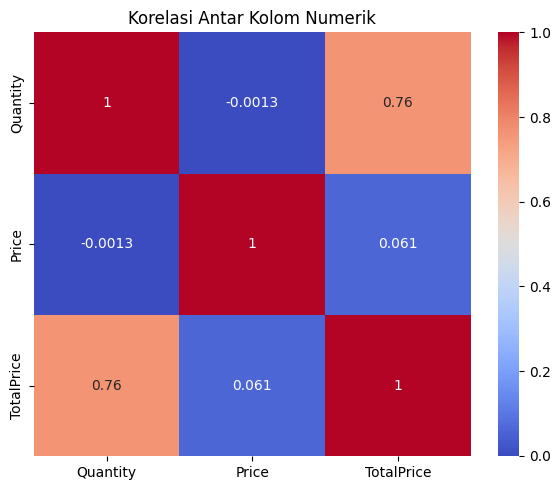

In [28]:
# Heatmap korelasi antar kolom numerik
plt.figure(figsize=(6,5))
sns.heatmap(df[['Quantity','Price','TotalPrice']].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Kolom Numerik")
plt.tight_layout()
plt.show()

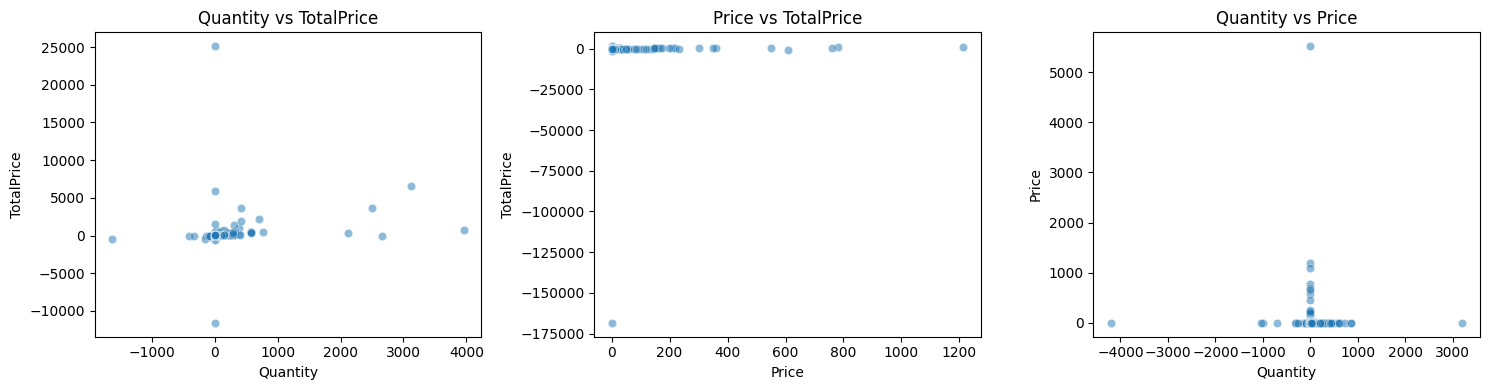

In [29]:
# Scatter plot untuk melihat hubungan antar kolom numerik dengan sample 10.000 baris
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.scatterplot(data=df.sample(10000), x='Quantity', y='TotalPrice', alpha=0.5)
plt.title('Quantity vs TotalPrice')

plt.subplot(1,3,2)
sns.scatterplot(data=df.sample(10000), x='Price', y='TotalPrice', alpha=0.5)
plt.title('Price vs TotalPrice')

plt.subplot(1,3,3)
sns.scatterplot(data=df.sample(10000), x='Quantity', y='Price', alpha=0.5)
plt.title('Quantity vs Price')

plt.tight_layout()
plt.show()

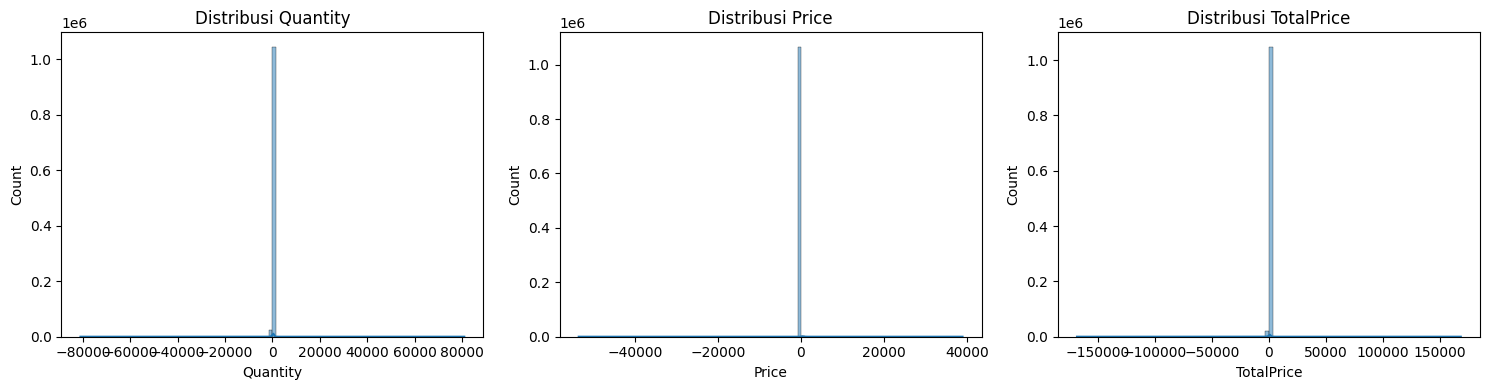

In [30]:
# Histogram untuk melihat distribusi  Quantity, Price, dan TotalPrice
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.histplot(df['Quantity'], bins=100, kde=True)
plt.title('Distribusi Quantity')

plt.subplot(1,3,2)
sns.histplot(df['Price'], bins=100, kde=True)
plt.title('Distribusi Price')

plt.subplot(1,3,3)
sns.histplot(df['TotalPrice'], bins=100, kde=True)
plt.title('Distribusi TotalPrice')

plt.tight_layout()
plt.show()

## **Data Preprocessing**

In [31]:
# Menghapus baris dengan missing Description atau Customer ID
df = df.dropna(subset=['Description', 'Customer ID'])
print(df[['Description','Customer ID']].isnull().sum())

Description    0
Customer ID    0
dtype: int64


In [32]:
# Menghapus baris duplikat
n_duplicates = df.duplicated().sum()
df = df.drop_duplicates()

print(f"Duplikat dihapus: {n_duplicates} baris")
print(f"Sisa baris: {len(df):,}")

Duplikat dihapus: 26479 baris
Sisa baris: 797,885


In [33]:
# Menghapus transaksi return (Invoice diawali 'C')
df = df[~df['Invoice'].str.startswith('C', na=False)]
print("Return dihapus")
print(f"Sisa baris: {len(df):,}")

Return dihapus
Sisa baris: 779,495


In [34]:
# Menghapus Quantity atau Price <= 0
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]
print("Quantity atau Price invalid dihapus")
print(f"Sisa baris: {len(df):,}")

Quantity atau Price invalid dihapus
Sisa baris: 779,425


In [35]:
# Menghapus StockCode non-produk
invalid_stock = ['POST','M','C2','ADJUST','BANK CHARGES','PADS','TEST001','TEST002']
df = df[~df['StockCode'].str.upper().isin(invalid_stock)]
print("StockCode non-produk dihapus")
print(f"Sisa baris: {len(df):,}")

StockCode non-produk dihapus
Sisa baris: 776,603


## **Analisis Data Quality**

In [36]:
# Menganalisis transaksi per pelanggan
transactions_per_customer = df.groupby('Customer ID')['Invoice'].nunique()
n_customers = transactions_per_customer.shape[0]

print(f"Statistik Transaksi Per Pelanggan")
print(f"Total transaksi      : {len(df):,}")
print(f"Total pelanggan unik : {n_customers:,}")
print(f"Rata-rata transaksi  : {transactions_per_customer.mean():.1f}")
print(f"Median transaksi     : {transactions_per_customer.median():.1f}")
print(f"Maks transaksi       : {transactions_per_customer.max():,}")
print(f"Min transaksi        : {transactions_per_customer.min():,}")

Statistik Transaksi Per Pelanggan
Total transaksi      : 776,603
Total pelanggan unik : 5,852
Rata-rata transaksi  : 6.3
Median transaksi     : 3.0
Maks transaksi       : 373
Min transaksi        : 1


In [37]:
# Top 10 pelanggan dengan transaksi terbanyak
print(f"Top 10 Pelanggan dengan Transaksi Terbanyak:")
top_customers = transactions_per_customer.sort_values(ascending=False).head(10)
for i, (cust_id, count) in enumerate(top_customers.items(), 1):
    print(f"  {i:2}. Customer {cust_id}: {count:,} transaksi")

# Distribusi berdasarkan frekuensi transaksi
print(f"\nDistribusi Pelanggan Berdasarkan Frekuensi Transaksi:")
bins = [1, 2, 5, 10, 20, 50, 100, 1000]
labels = ['1', '2-5', '6-10', '11-20', '21-50', '51-100', '100+']
transactions_binned = pd.cut(transactions_per_customer, bins=bins, labels=labels, right=False)
distribusi = transactions_binned.value_counts().sort_index()

for bin_label, count in distribusi.items():
    percentage = (count / n_customers) * 100
    print(f"  {bin_label:7} transaksi: {count:5,} pelanggan ({percentage:5.1f}%)")

Top 10 Pelanggan dengan Transaksi Terbanyak:
   1. Customer 14911: 373 transaksi
   2. Customer 12748: 322 transaksi
   3. Customer 17841: 211 transaksi
   4. Customer 15311: 207 transaksi
   5. Customer 13089: 203 transaksi
   6. Customer 14606: 184 transaksi
   7. Customer 17850: 155 transaksi
   8. Customer 14646: 145 transaksi
   9. Customer 18102: 145 transaksi
  10. Customer 14156: 144 transaksi

Distribusi Pelanggan Berdasarkan Frekuensi Transaksi:
  1       transaksi: 1,618 pelanggan ( 27.6%)
  2-5     transaksi: 2,093 pelanggan ( 35.8%)
  6-10    transaksi: 1,180 pelanggan ( 20.2%)
  11-20   transaksi:   636 pelanggan ( 10.9%)
  21-50   transaksi:   271 pelanggan (  4.6%)
  51-100  transaksi:    34 pelanggan (  0.6%)
  100+    transaksi:    20 pelanggan (  0.3%)


## **Feature Engineering (Membuat Fitur RFM)**

In [38]:
# Perhitungan metrik RFM per Customer ID

# Tanggal referensi (satu hari setelah tanggal transaksi terakhir)
latest_date = df['InvoiceDate'].max() + timedelta(days=1)

# Menghitung Recency, Frequency, Monetary
rfm = df.groupby('Customer ID').agg(
    Recency=('InvoiceDate', lambda x: (latest_date - x.max()).days),
    Frequency=('Invoice', 'nunique'),
    Monetary=('TotalPrice', 'sum')
).reset_index()

display(rfm.head())

,Customer ID,Recency,Frequency,Monetary
0,12346,326,3,77352.96
1,12347,2,8,4921.53
2,12348,75,5,1658.40
3,12349,19,3,3678.69
4,12350,310,1,294.40


## **Analisis Distribusi RFM**

,Recency,Frequency,Monetary
count,5852.00,5852.00,5852.00
mean,200.20,6.25,2918.94
std,208.51,12.75,14315.11
min,1.00,1.00,2.95
25%,25.00,1.00,339.58
50%,95.00,3.00,856.02
75%,379.00,7.00,2241.03
max,739.00,373.00,580987.04


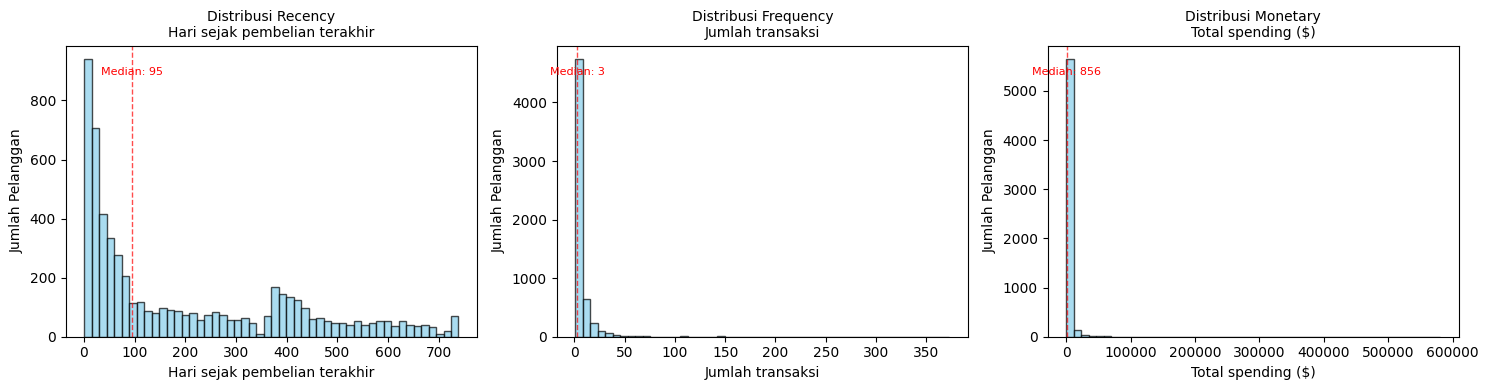

In [39]:
rfm_stats = rfm[['Recency', 'Frequency', 'Monetary']].describe().round(2)
display(rfm_stats)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, (col, title) in enumerate(zip(
    ['Recency', 'Frequency', 'Monetary'],
    ['Hari sejak pembelian terakhir', 'Jumlah transaksi', 'Total spending ($)']
)):
    axes[idx].hist(rfm[col], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[idx].set_title(f'Distribusi {col}\n{title}', fontsize=10)
    axes[idx].set_xlabel(title)
    axes[idx].set_ylabel('Jumlah Pelanggan')

    median_val = rfm[col].median()
    axes[idx].axvline(x=median_val, color='red', linestyle='--', alpha=0.7, linewidth=1)
    axes[idx].text(median_val, axes[idx].get_ylim()[1]*0.9,
                  f'Median: {median_val:.0f}',
                  color='red', ha='center', fontsize=8)

plt.tight_layout()
plt.show()

## **Data Preparation Untuk Modeling**

In [40]:
# Transformasi Logaritmik untuk menangani skewness
X_rfm = rfm[['Recency', 'Frequency', 'Monetary']]

rfm_log = X_rfm.apply(np.log1p)
rfm_log.columns = ['Recency_log', 'Frequency_log', 'Monetary_log']

X = rfm_log[['Recency_log', 'Frequency_log', 'Monetary_log']]

display(X.describe().T)

,count,mean,std,min,25%,50%,75%,max
Recency_log,5852.0,4.448612,1.558149,0.693147,3.258097,4.564348,5.940171,6.606650
Frequency_log,5852.0,1.547217,0.807839,0.693147,0.693147,1.386294,2.079442,5.924256
Monetary_log,5852.0,6.808403,1.380914,1.373716,5.830635,6.753461,7.715137,13.272485


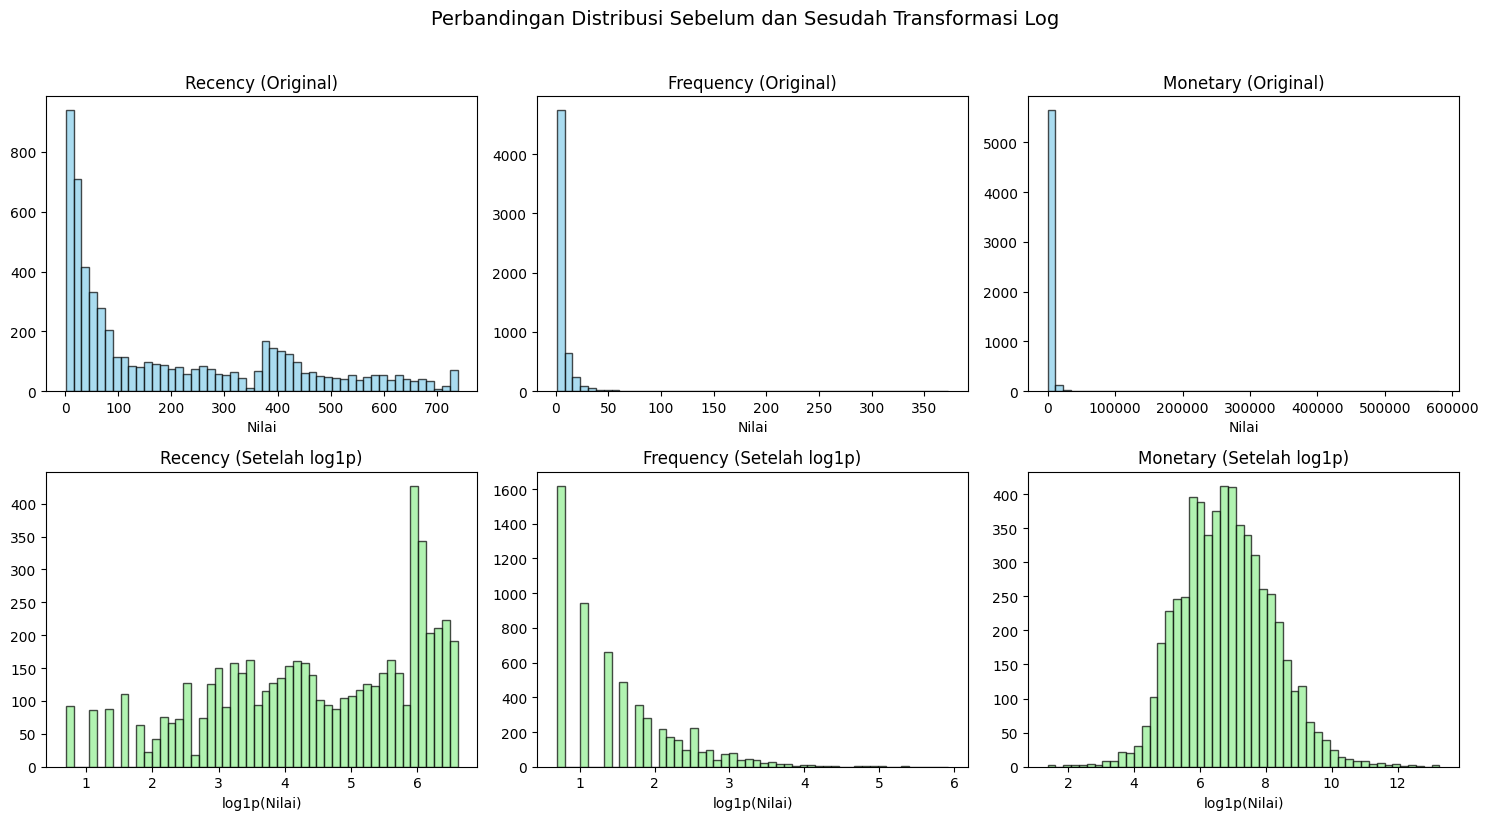

In [41]:
# Visualisasi distribusi setelah log transform
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

features = ['Recency', 'Frequency', 'Monetary']
for idx, feature in enumerate(features):

    axes[0, idx].hist(rfm[feature], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, idx].set_title(f'{feature} (Original)')
    axes[0, idx].set_xlabel('Nilai')

    axes[1, idx].hist(rfm_log[f'{feature}_log'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[1, idx].set_title(f'{feature} (Setelah log1p)')
    axes[1, idx].set_xlabel('log1p(Nilai)')

plt.suptitle('Perbandingan Distribusi Sebelum dan Sesudah Transformasi Log', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

In [42]:
# Normalisasi data dengan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Mengkonversi kembali ke DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

display(X_scaled_df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Recency_log,5852.0,-4.043246e-16,1.000085,-2.410415,-0.764123,0.074284,0.957345,1.385119
Frequency_log,5852.0,-9.956340e-17,1.000085,-1.057318,-1.057318,-0.199218,0.658881,5.418668
Monetary_log,5852.0,-4.128239e-16,1.000085,-3.935908,-0.708118,-0.039790,0.656675,4.681416


In [43]:
# Fitur untuk clustering
X_clustering = X_scaled_df.to_numpy()
print(f"Data siap untuk clustering: {X_clustering.shape}")

Data siap untuk clustering: (5852, 3)


## **Evaluasi Model Clustering**

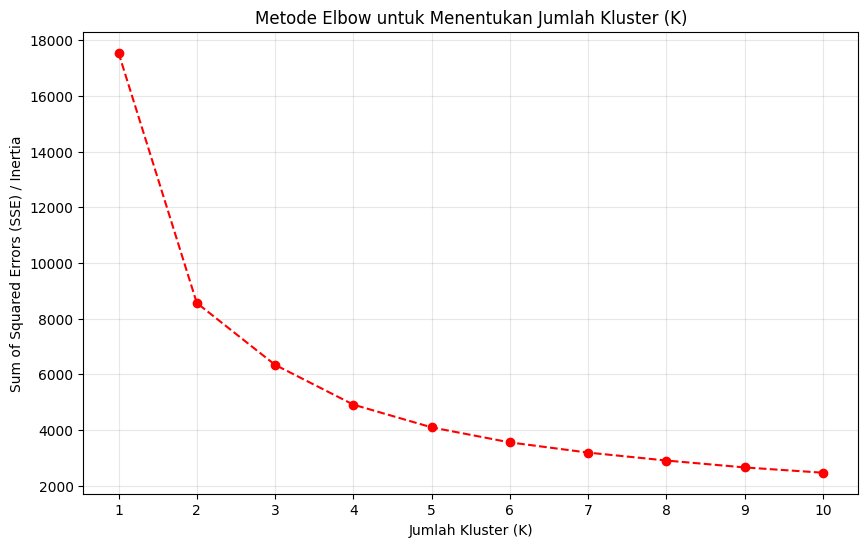

In [44]:
# Evaluasi 1.Elbow Method
# Menentukan K optimal menggunakan Metode Elbow
k_range = range(1, 11)
sse = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled_df)
    sse.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o', linestyle='--', color='red')
plt.title('Metode Elbow untuk Menentukan Jumlah Kluster (K)')
plt.xlabel('Jumlah Kluster (K)')
plt.ylabel('Sum of Squared Errors (SSE) / Inertia')
plt.xticks(k_range)
plt.grid(alpha=0.3)
plt.show()

In [45]:
# Evaluasi 2. Silhouette Score
# Menentukan K optimal menggunakan Silhouette Score
k_range_silhouette = range(2, 11)
silhouette_scores_list = []

for k in k_range_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_scaled_df)
    score = silhouette_score(X_scaled_df, clusters)
    silhouette_scores_list.append(score)

silhouette_df = pd.DataFrame({
    'K': k_range_silhouette,
    'Silhouette Score': [round(s, 3) for s in silhouette_scores_list]
})
display(silhouette_df)

,K,Silhouette Score
0,2,0.438
1,3,0.347
2,4,0.365
3,5,0.342
4,6,0.335
5,7,0.306
6,8,0.306
7,9,0.288
8,10,0.289


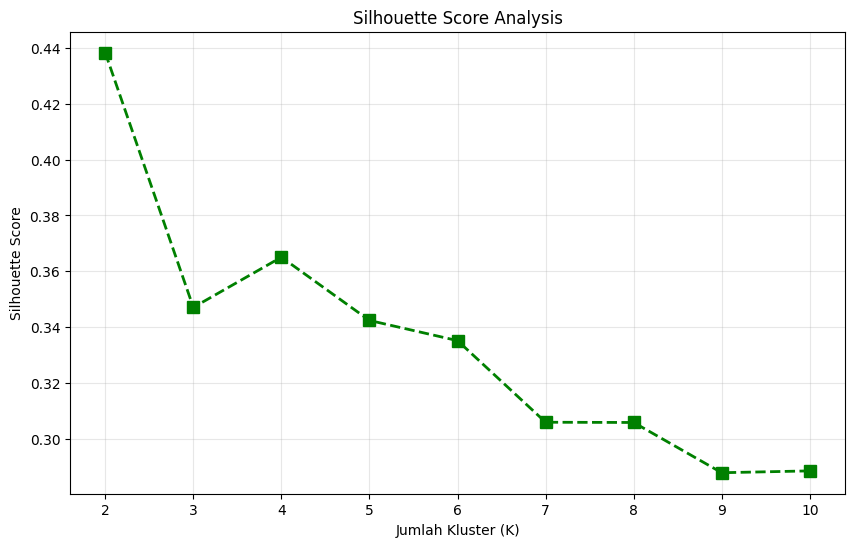

In [46]:
# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_range_silhouette, silhouette_scores_list, marker='s', linestyle='--',
         color='green', linewidth=2, markersize=8)
plt.title('Silhouette Score Analysis')
plt.xlabel('Jumlah Kluster (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range_silhouette)
plt.grid(alpha=0.3)

In [47]:
# Pelatihan model K-Means dengan K=4
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Melatih model dan mendapatkan label kluster
clusters = kmeans.fit_predict(X_scaled_df)

# Evaluasi model final
score_final = silhouette_score(X_scaled_df, clusters)
print(f"Silhouette Score final: {score_final:.4f}")

Silhouette Score final: 0.3651


## **Model Inference**

In [48]:
# Menambahkan label kluster ke DataFrame RFM
rfm['Cluster'] = clusters

# Menampilkan proporsi pelanggan per kluster
cluster_dist = rfm['Cluster'].value_counts().sort_index()

cluster_info = []
for cluster_id in cluster_dist.index:
    count = cluster_dist[cluster_id]
    percentage = (count / len(rfm)) * 100
    cluster_info.append({
        'Cluster': cluster_id,
        'Jumlah_Pelanggan': count,
        'Persentase': f"{percentage:.2f}%"
    })
cluster_df = pd.DataFrame(cluster_info)

display(cluster_df)

,Cluster,Jumlah_Pelanggan,Persentase
0,0,1454,24.85%
1,1,1184,20.23%
2,2,1968,33.63%
3,3,1246,21.29%


## **Analisis Centroid & Penamaan Segment**

In [49]:
centroids_scaled = kmeans.cluster_centers_
centroids_unscaled = scaler.inverse_transform(centroids_scaled)
centroids_original = np.expm1(centroids_unscaled)

centroids_original_df = pd.DataFrame(
    centroids_original,
    columns=['Recency', 'Frequency', 'Monetary']
)
centroids_original_df.index.name = 'Cluster'

display(centroids_original_df.round(2))

order = centroids_original_df['Monetary'].sort_values(ascending=False).index.tolist()

names = ['Champions', 'Loyal', 'Potential', 'Dormant']

cluster_name_map = {order[i]: names[i] for i in range(4)}

print("\nMapping Cluster ke Segment Berdasarkan Monetary tertinggi ke terendah")

for i, cid in enumerate(order):
    seg = names[i]
    r, f, m = centroids_original_df.loc[cid]
    print(f"\n{seg} (Cluster {cid})")
    print(f"  Recency   : {r:.0f} hari")
    print(f"  Frequency : {f:.1f} transaksi")
    print(f"  Monetary  : ${m:,.0f}")

rfm['Segment'] = rfm['Cluster'].map(cluster_name_map)

print("\nRingkasan jumlah pelanggan per segmen:")
for seg, count in rfm['Segment'].value_counts().items():
    pct = (count / len(rfm)) * 100
    print(f"  {seg}: {count:,} pelanggan ({pct:.1f}%)")

segment_names = cluster_name_map

,Recency,Frequency,Monetary
Cluster,,,
0,175.03,4.60,1525.45
1,14.86,14.79,5703.83
2,330.79,1.31,246.56
3,20.42,2.72,663.61



Mapping Cluster ke Segment Berdasarkan Monetary tertinggi ke terendah

Champions (Cluster 1)
  Recency   : 15 hari
  Frequency : 14.8 transaksi
  Monetary  : $5,704

Loyal (Cluster 0)
  Recency   : 175 hari
  Frequency : 4.6 transaksi
  Monetary  : $1,525

Potential (Cluster 3)
  Recency   : 20 hari
  Frequency : 2.7 transaksi
  Monetary  : $664

Dormant (Cluster 2)
  Recency   : 331 hari
  Frequency : 1.3 transaksi
  Monetary  : $247

Ringkasan jumlah pelanggan per segmen:
  Dormant: 1,968 pelanggan (33.6%)
  Loyal: 1,454 pelanggan (24.8%)
  Potential: 1,246 pelanggan (21.3%)
  Champions: 1,184 pelanggan (20.2%)


## **Visualisasi Hasil Clustering**

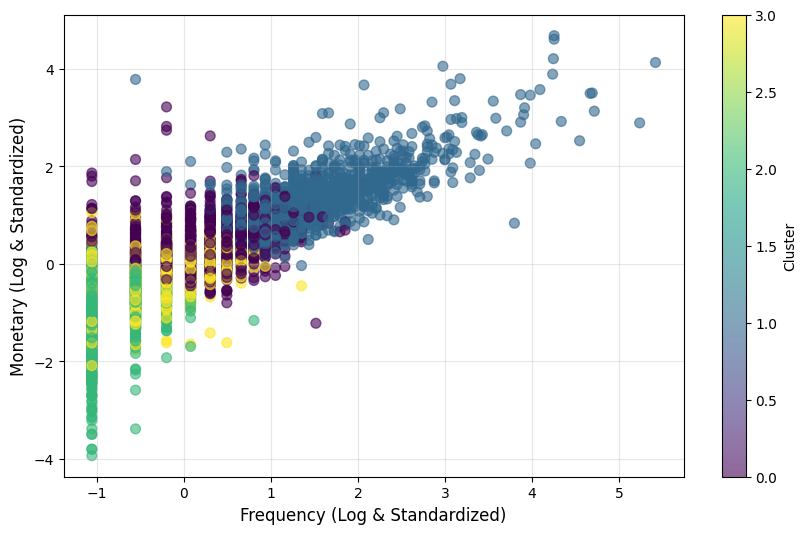

In [50]:
# Visualisasi Scatter Plot 2D
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 1], X_scaled[:, 2],
                      c=clusters, cmap='viridis', alpha=0.6, s=50)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Frequency (Log & Standardized)', fontsize=12)
plt.ylabel('Monetary (Log & Standardized)', fontsize=12)
plt.grid(True, alpha=0.3)

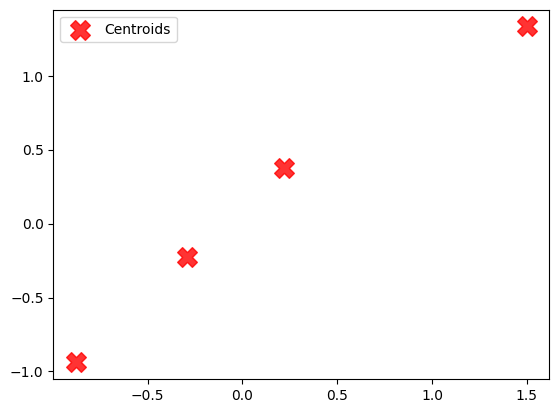

In [51]:
# Menambahkan centroid
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2],
           c='red', s=200, alpha=0.8, marker='X', label='Centroids')
plt.legend()
plt.show()

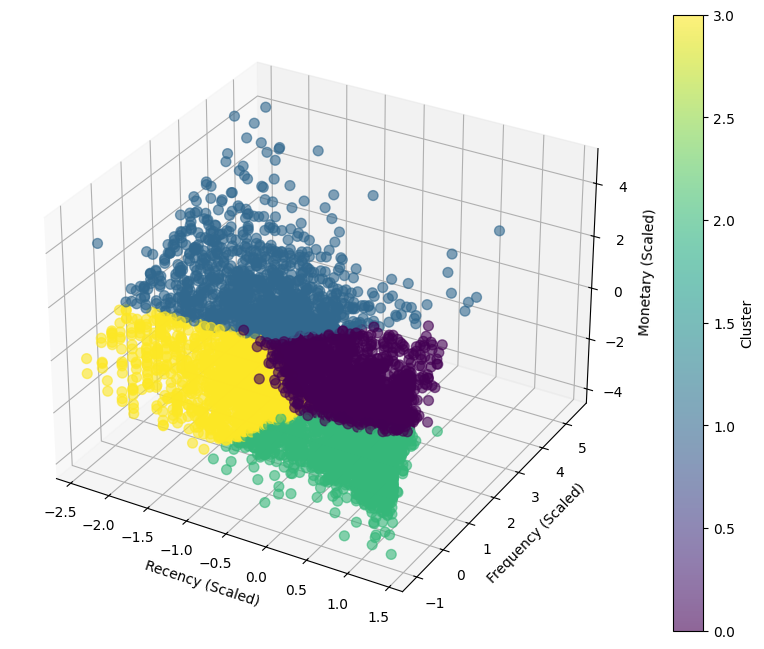

In [52]:
# Visualisasi 3D Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2],
                     c=clusters, cmap='viridis', alpha=0.6, s=50)
ax.set_xlabel('Recency (Scaled)', fontsize=10)
ax.set_ylabel('Frequency (Scaled)', fontsize=10)
ax.set_zlabel('Monetary (Scaled)', fontsize=10)
plt.colorbar(scatter, ax=ax, label='Cluster')
plt.show()

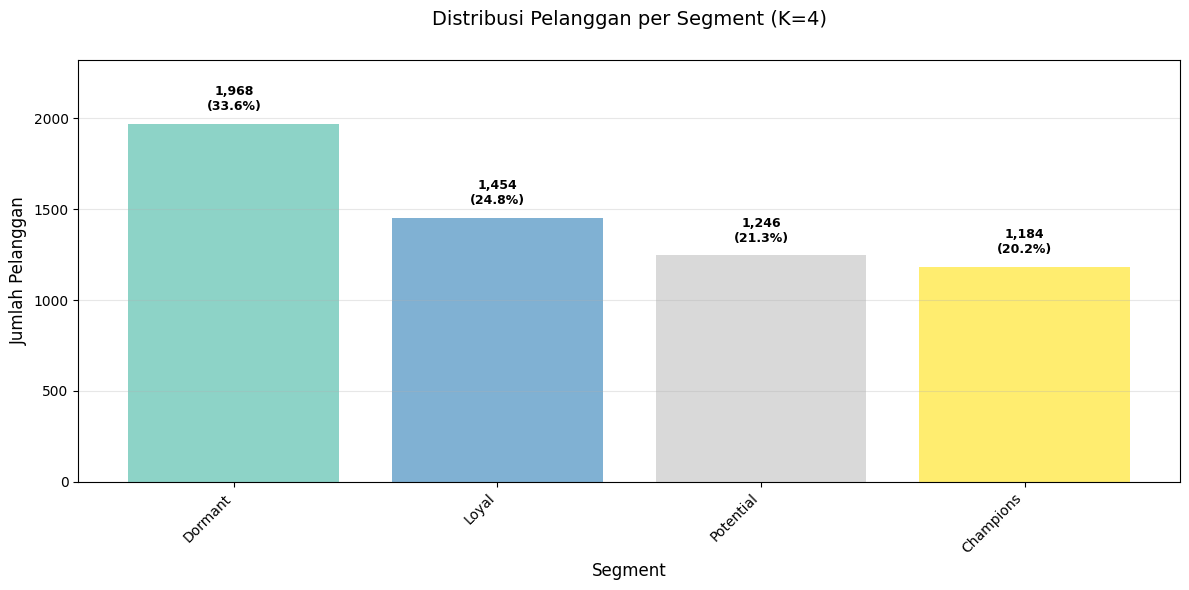

In [53]:
# Visualisasi Distribusi Pelanggan Per Segment
if 'Segment' in rfm.columns:
    segment_counts = rfm['Segment'].value_counts()
    labels = segment_counts.index.tolist()
    values = segment_counts.values
    max_val = values.max()

    plt.figure(figsize=(12, 6))
    colors = plt.cm.Set3(np.linspace(0, 1, len(values)))
    bars = plt.bar(range(len(values)), values, color=colors)

    plt.xlabel('Segment', fontsize=12)
    plt.ylabel('Jumlah Pelanggan', fontsize=12)
    plt.title(f'Distribusi Pelanggan per Segment (K={optimal_k})', fontsize=14, pad=25)

    plt.xticks(range(len(values)), labels, rotation=45, ha='right')

    top_margin_factor = 1.18
    plt.ylim(0, max_val * top_margin_factor)

    for i, (seg, count) in enumerate(segment_counts.items()):
        pct = (count / len(rfm)) * 100
        y_text = count + max_val * 0.03

        plt.text(i, y_text,
                 f'{count:,}\n({pct:.1f}%)',
                 ha='center', va='bottom', fontsize=9, fontweight='bold',
                 bbox=dict(facecolor='white', edgecolor='none', pad=1))

    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()

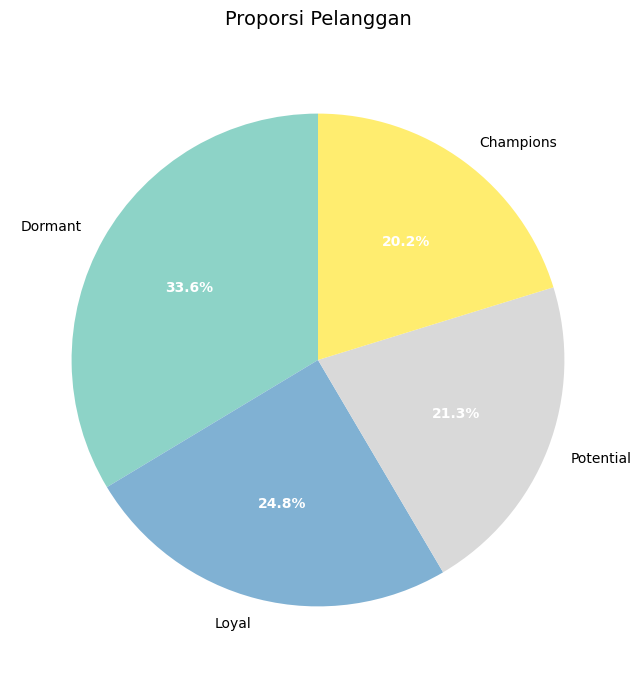

In [54]:
# Visualisasi Pie Chart Proporsi
plt.figure(figsize=(8, 8))
colors = plt.cm.Set3(np.linspace(0, 1, len(segment_counts)))
wedges, texts, autotexts = plt.pie(segment_counts.values,
                                   labels=segment_counts.index,
                                   autopct='%1.1f%%',
                                   colors=colors,
                                   startangle=90,
                                   textprops={'fontsize': 10})

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.title(f'Proporsi Pelanggan', fontsize=14, pad=20)
plt.show()

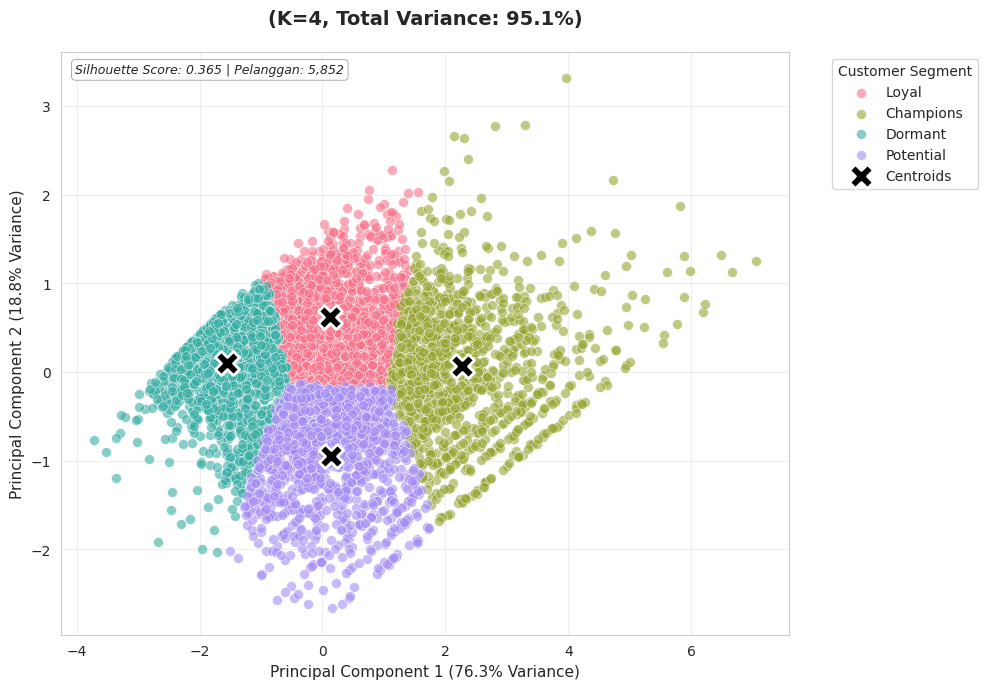

In [55]:
# Visualisasi dengan PCA (Principal Component Analysis)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled_df)

centroids_df = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=X_scaled_df.columns
)
centroids_pca = pca.transform(centroids_df)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 7))
sns.set_style("whitegrid")

palette = sns.color_palette("husl", optimal_k)

for cluster_id in range(optimal_k):
    segment_name = segment_names.get(cluster_id, f'Cluster {cluster_id}')
    plt.scatter(
        X_pca[clusters == cluster_id, 0],
        X_pca[clusters == cluster_id, 1],
        s=50,
        alpha=0.6,
        label=f'{segment_name}',
        color=palette[cluster_id],
        edgecolor='white',
        linewidth=0.5
    )

plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    c='black',
    marker='X',
    s=300,
    edgecolors='white',
    linewidths=2,
    label='Centroids',
    zorder=10
)

plt.xlabel(f'Principal Component 1 ({explained_variance[0]*100:.1f}% Variance)', fontsize=11)
plt.ylabel(f'Principal Component 2 ({explained_variance[1]*100:.1f}% Variance)', fontsize=11)

plt.title(
    f'(K={optimal_k}, Total Variance: {(explained_variance[0] + explained_variance[1]) * 100:.1f}%)',
    fontsize=14,
    fontweight='bold',
    pad=20
)

plt.legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)

plt.text(
    0.02,
    0.98,
    f'Silhouette Score: {score_final:.3f} | Pelanggan: {len(rfm):,}',
    transform=plt.gca().transAxes,
    fontsize=9,
    style='italic',
    verticalalignment='top',
    bbox=dict(
        boxstyle='round,pad=0.3',
        facecolor='white',
        alpha=0.9,
        edgecolor='gray',
        linewidth=0.5
    )
)

plt.tight_layout()
plt.show()

## **Tabel Statistik Deskriptif Per Segment**

In [56]:
summary_stats = rfm.groupby('Cluster').agg({
    'Recency': ['min', 'max', 'mean'],
    'Frequency': ['min', 'max', 'mean'],
    'Monetary': ['min', 'max', 'mean', 'sum']
})

summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]

cluster_counts = rfm['Cluster'].value_counts().sort_index()
summary_stats['Jumlah_Pelanggan'] = cluster_counts
summary_stats['Persentase'] = (cluster_counts / len(rfm) * 100).round(1)

summary_stats['Segment'] = summary_stats.index.map(segment_names)

cols_order = ['Segment', 'Jumlah_Pelanggan', 'Persentase', 'Monetary_sum',
              'Recency_min', 'Recency_max', 'Recency_mean',
              'Frequency_min', 'Frequency_max', 'Frequency_mean',
              'Monetary_min', 'Monetary_max', 'Monetary_mean']

multi_df = summary_stats[cols_order].copy()

multi_df['Jumlah_Pelanggan'] = multi_df['Jumlah_Pelanggan'].apply(lambda x: f"{x:,}")
multi_df['Persentase'] = multi_df['Persentase'].apply(lambda x: f"{x}%")
multi_df['Monetary_sum'] = multi_df['Monetary_sum'].apply(lambda x: f"${x:,.0f}")
multi_df['Monetary_min'] = multi_df['Monetary_min'].apply(lambda x: f"${x:,.0f}")
multi_df['Monetary_max'] = multi_df['Monetary_max'].apply(lambda x: f"${x:,.0f}")
multi_df['Monetary_mean'] = multi_df['Monetary_mean'].apply(lambda x: f"${x:,.0f}")

multi_df.columns = pd.MultiIndex.from_tuples([
    ('', 'Segment'),
    ('Pelanggan', 'Jumlah'),
    ('Pelanggan', 'Persentase'),
    ('Revenue', 'Total'),
    ('Recency', 'min'),
    ('Recency', 'max'),
    ('Recency', 'mean'),
    ('Frequency', 'min'),
    ('Frequency', 'max'),
    ('Frequency', 'mean'),
    ('Monetary', 'min'),
    ('Monetary', 'max'),
    ('Monetary', 'mean')
])

multi_df.index.name = 'Cluster'

display(multi_df)

Pelanggan                 Revenue Recency                   \
           Segment    Jumlah Persentase        Total     min  max        mean   
Cluster                                                                         
0            Loyal     1,454      24.8%   $2,869,611      31  738  227.740028   
1        Champions     1,184      20.2%  $12,539,844       1  576   27.685811   
2          Dormant     1,968      33.6%     $623,744      23  739  392.521341   
3        Potential     1,246      21.3%   $1,048,419       1   99   28.220706   

        Frequency                 Monetary                     
              min  max       mean      min       max     mean  
Cluster                                                        
0               1   20   5.079092     $167   $77,353   $1,974  
1               2  373  19.197635     $862  $580,987  $10,591  
2               1    8   1.378557       $3    $1,652     $317  
3               1   13   3.028892      $43    $4,026     $841

## **Analisis Segmentasi Pelanggan Berdasarkan RFM**

Segmentasi pelanggan dengan model K-Means RFM membagi pelanggan ke dalam empat segmen (Champions, Loyal, Potential, dan Dormant). Setiap segmen menunjukkan perilaku dan nilai yang berbeda, sehingga strategi pemasaran harus disesuaikan agar lebih efektif.

## **Analisis dan Karakteristik Tiap Cluster**

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

#### **Cluster 0 (Loyal)**

* **Jumlah Pelanggan:** 1.454 (24,8%)  

* **Total Revenue:** $2,869,611   

* **Recency Rata-rata:** 228 hari  

* **Frekuensi Rata-rata:** 5,1 transaksi  

* **Monetary Rata-rata:** $1,974  


**Analisis:**  
Cluster ini terdiri dari pelanggan yang memiliki hubungan jangka panjang dengan brand. Mereka pernah cukup aktif bertransaksi dan menunjukkan konsistensi dalam membeli produk, meskipun beberapa bulan terakhir frekuensinya menurun. Penurunan aktivitas dapat terjadi karena perubahan kebutuhan, kurangnya promosi yang relevan, atau faktor eksternal lainnya. Segmen ini memiliki potensi tinggi untuk kembali aktif. Strategi personal, komunikasi relevan, dan program loyalitas dapat mendorong mereka melakukan pembelian ulang dan meningkatkan kontribusi terhadap pendapatan.

#### **Cluster 1 (Champions)**

* **Jumlah Pelanggan:** 1.184 (20,2%)  

* **Total Revenue:** $12,539,844  

* **Recency Rata-rata:** 28 hari  

* **Frekuensi Rata-rata:** 19,2 transaksi

* **Monetary Rata-rata:** $10,591  

**Analisis:**  
Cluster ini terdiri dari pelanggan paling berharga bagi perusahaan. Mereka rutin bertransaksi sehingga memiliki nilai pembelian yang tinggi, dan baru saja melakukan pembelian. Loyalitas mereka kuat dan mereka cenderung menjadi promotor brand. Kehilangan pelanggan ini akan berdampak besar terhadap pendapatan, sehingga mempertahankan kepuasan dan loyalitas mereka menjadi prioritas. Segmen ini juga sensitif terhadap pengalaman buruk, sehingga pelayanan cepat, konsisten, dan personal sangat penting.


#### **Cluster 2 (Dormant)**

* **Jumlah Pelanggan:** 1.968 (33,6%)  

* **Total Revenue:** $623,744

* **Recency Rata-rata:** 393 hari  

* **Frekuensi Rata-rata:** 1,4 transaksi

* **Monetary Rata-rata:** $317  

**Analisis:**  
Cluster ini terdiri dari segmen terbesar namun kontribusinya paling kecil. Banyak pelanggan hanya pernah bertransaksi satu atau dua kali, kemudian berhenti lebih dari satu tahun. Mereka hampir hilang, dan hanya sebagian kecil yang berpotensi diaktifkan kembali. Pendekatan harus selektif agar biaya pemasaran sebanding dengan potensi pendapatan.


#### **Cluster 3 (Potential)**

* **Jumlah Pelanggan:** 1.246 (21,3%)  

* **Total Revenue:** $1,048,419

* **Recency Rata-rata:** 28 hari  

* **Frekuensi Rata-rata:** 3,0 transaksi  

* **Monetary Rata-rata:** $841  

**Analisis:**  
Cluster ini terdiri dari pelanggan yang mulai menunjukkan minat dan keterlibatan. Mereka sudah melakukan beberapa transaksi meski nilai belanjanya masih kecil. Segmen ini memiliki potensi tinggi untuk berkembang menjadi Loyal atau Champions jika dikelola dengan tepat. Edukasi produk, rekomendasi relevan, dan promosi awal dapat mempercepat keterikatan mereka dengan brand.



## **Insight Pemasaran Tiap Cluster**


#### **Cluster 0 (Loyal)**
Loyal adalah pelanggan yang pernah sangat aktif dan memiliki hubungan jangka panjang dengan brand. Mereka tahu produk kita, pernah rutin membeli, tapi belakangan aktivitasnya menurun

**Strategi Pemasaran**  
- Kirim pengingat secara sopan dan personal, misalnya rekomendasi produk yang relevan dengan transaksi sebelumnya  
- Jalankan kampanye “Welcome Back!” dengan pesan yang bersahabat, menegaskan bahwa brand menghargai mereka  
- Berikan program poin atau hadiah untuk pembelian berikutnya agar mendorong pelanggan kembali bertransaksi  
- Tawarkan paket bundling atau promo eksklusif untuk meningkatkan frekuensi pembelian

#### **Cluster 1 (Champions)**
Champions adalah pelanggan paling berharga. Mereka sering membeli, nilai transaksi tinggi, dan baru saja berinteraksi dengan brand. Kehilangan mereka langsung berpengaruh ke pendapatan

**Strategi Pemasaran**  
- Berikan layanan prioritas dan pengalaman eksklusif, misalnya akses awal produk baru atau pre-order  
- Tawarkan program VIP, hadiah khusus, atau bonus tahunan yang membuat mereka merasa dihargai  
- Personalisasi komunikasi berdasarkan riwayat belanja dan preferensi mereka, mereka menghargai perhatian dan relevansi  
- Pastikan pengalaman mereka selalu mulus dan memuaskan karena segmen ini sensitif terhadap kesalahan atau ketidaksesuaian layanan  

#### **Cluster 2 (Dormant)**
Dormant adalah pelanggan yang hampir hilang. Banyak yang hanya belanja sekali atau dua kali, lalu berhenti lebih dari setahun. Tidak semua bisa diaktifkan kembali, jadi harus selektif

**Strategi Pemasaran**  
- Fokus pada mereka yang pernah membeli bernilai tinggi atau menunjukkan minat di masa lalu  
- Kirim kampanye win-back dengan diskon menarik atau penawaran yang bernilai  
- Gunakan pesan personal dan emosional, misal “Kami merindukan Anda” atau “Ada produk baru yang mungkin Anda sukai”  
- Lakukan pendekatan bertahap, uji respons mereka dulu sebelum mengalokasikan anggaran besar  

#### **Cluster 3 (Potential)**
Potential adalah pelanggan yang mulai aktif, melakukan beberapa transaksi, tapi nilainya masih kecil. Mereka bisa menjadi Loyal atau Champions di masa depan

**Strategi Pemasaran**  
- Edukasi produk dan berikan tips atau konten relevan agar mereka merasa terbantu dan terhubung  
- Tawarkan bundling atau upsell ringan untuk meningkatkan nilai transaksi secara natural  
- Bangun engagement dengan komunikasi rutin yang ramah dan relevan, jangan terlalu agresif tapi tetap konsisten  
- Gunakan promo onboarding atau voucher untuk transaksi kedua atau ketiga agar mereka semakin nyaman berbelanja dan terbiasa dengan brand


## **Mengeksport Data**

In [57]:
# Menyimpan hasil ke dalam file CSV

rfm.to_csv('customer_segmentation.csv', index=False)
print("Data hasil clustering disimpan sebagai 'customer_segmentation.csv'")

Data hasil clustering disimpan sebagai 'customer_segmentation.csv'
